# DEFINIÇÃO DO PROBLEMA DE NEGÓCIO

![title](imagens/imagem.jpg)

* A base de dados esta disponível em - **https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset**

 O conjunto de dados consiste em vetores de recursos pertencentes a 12.330 sessões online. O conjunto de dados foi formado de modo que cada sessão pertença a um usuário diferente em um período de 1 ano para evitar qualquer tendência para uma campanha específica, dia especial, usuário, perfil ou período.

O conjunto de dados consiste em 10 atributos numéricos e 8 categóricos. O atributo 'Revenue' pode ser usado como o rótulo da classe.

# IMPORTAÇÃO DE BIBLIOTECAS

In [1]:
import time
import pandas as pd
import numpy as np
from sklearn.preprocessing import (StandardScaler, LabelEncoder)
from sklearn.model_selection import (GridSearchCV, train_test_split)
from sklearn.metrics import (precision_score, recall_score, f1_score, accuracy_score, roc_auc_score)
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns

# CARGA DE DADOS

In [2]:
# Carregando os dados.
df = pd.read_csv('FCD/FCD/MachineLearning/Cap 11/dados/online_shoppers_intention.csv')

# ANÁLISE EXPLORATÓRIA

In [3]:
# Visualizando os dados.
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
# Quantidade de observações e atributos.
df.shape

(12330, 18)

In [5]:
# Metadados dos dados.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
# Valores faltantes. 
df.isnull().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

In [7]:
# Removendo valores faltantes 
df.dropna(inplace = True)

In [8]:
# Valores faltantes 
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [9]:
# Normalmente variáveis que contenham uma quantia menor que 30 valores únicos, são variáveis categoricas
df.nunique()

Administrative               27
Administrative_Duration    3336
Informational                17
Informational_Duration     1259
ProductRelated              311
ProductRelated_Duration    9552
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [10]:
# Loop for para separar variáveis categoricas de numéricas
dfbck = df.copy()

continuos = []
categorical = []

for c in df.columns[:-1]:
    if df.nunique()[c] >= 30:
        continuos.append(c)
    else:
        categorical.append(c)

In [11]:
# Variáveis Quantitativas
continuos

['Administrative_Duration',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues']

In [12]:
# Visualizando as variáveis quantitativas
df[continuos].head()

,Administrative_Duration,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0
1,0.0,0.0,2.0,64.000000,0.00,0.10,0.0
2,-1.0,-1.0,1.0,-1.000000,0.20,0.20,0.0
3,0.0,0.0,2.0,2.666667,0.05,0.14,0.0
4,0.0,0.0,10.0,627.500000,0.02,0.05,0.0


In [13]:
# Visualizando as variáveis qualitativas
df[categorical].head()

,Administrative,Informational,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False
1,0.0,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False
2,0.0,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False
3,0.0,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False
4,0.0,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True


# VISUALIZAÇÃO DOS DADOS

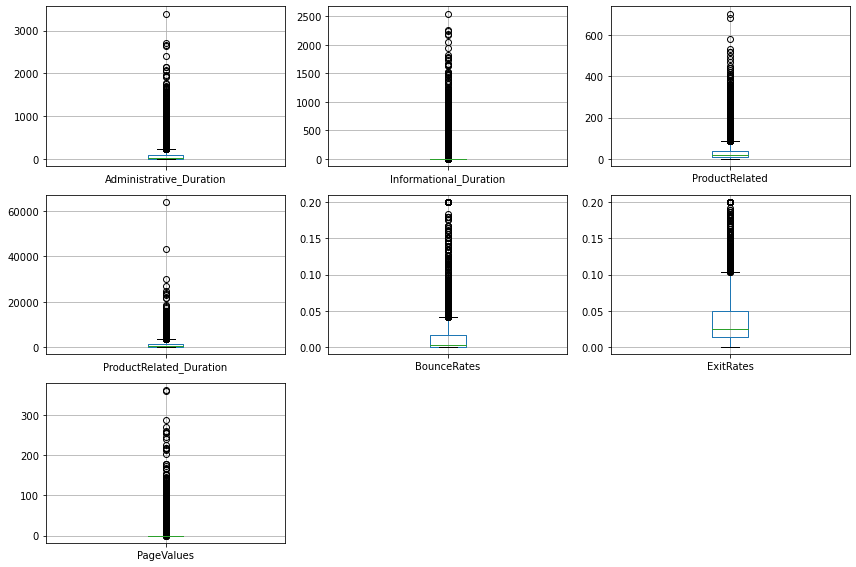

In [14]:
# Plot.
fig = plt.figure(figsize = (12,8))

for i, col in enumerate(continuos):
    plt.subplot(3,3, i + 1)
    df.boxplot(col)
    plt.tight_layout()

In [15]:
# Transformação de log para uma melhor visualização.
df[continuos] = np.log1p(1 + df[continuos])

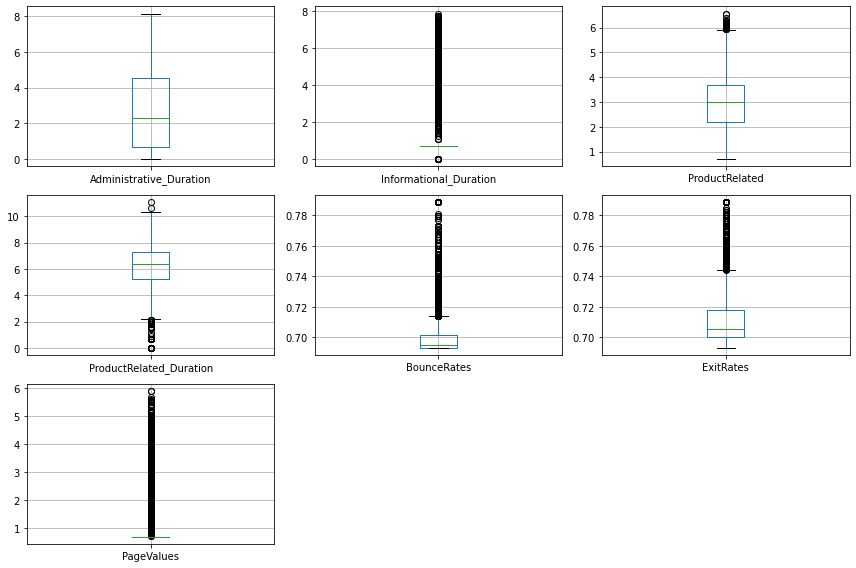

In [16]:
# Plot.
fig = plt.figure(figsize = (12,8))

for i, col in enumerate(continuos):
    
    plt.subplot(3,3,i + 1)
    df.boxplot(col)
    plt.tight_layout()

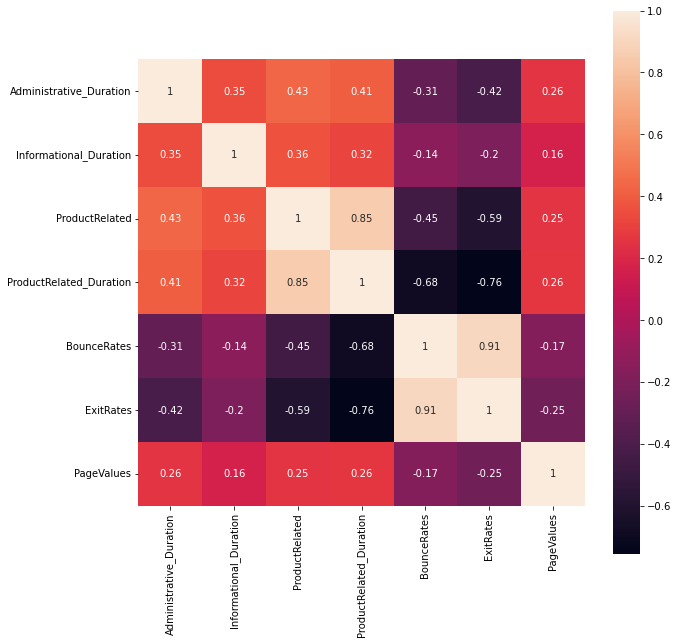

In [17]:
# Plot de correlação entre as variáveis.
fig = plt.figure(figsize = (10,10))

sns.heatmap(df[continuos].corr(), vmax = 1., square = True, annot = True);

/home/igor/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


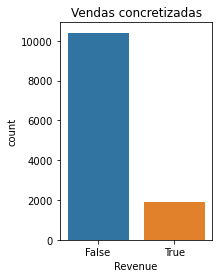

In [18]:
# Plot exibindo a quantia de conversões.
plt.subplot(1,2,2);
plt.title('Vendas concretizadas');
sns.countplot(df['Revenue']);

/home/igor/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


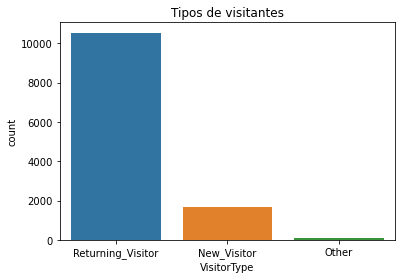

In [19]:
# Plot exibindo a classe de visitantes.
plt.title('Tipos de visitantes');
sns.countplot(df['VisitorType']);

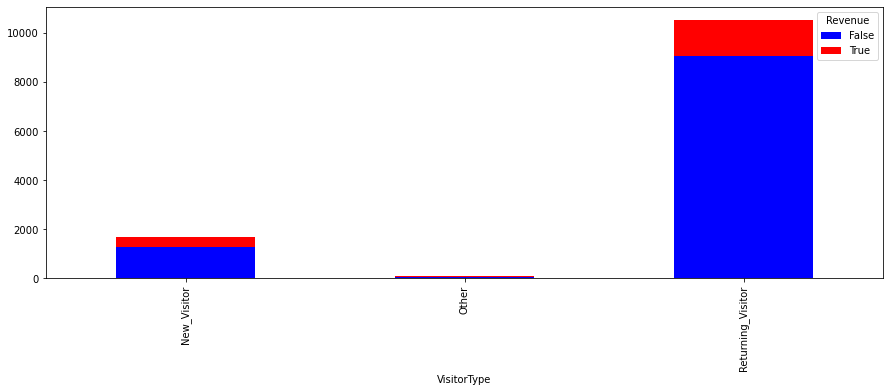

In [20]:
# Conversões baseadas na classe do visitante.
pd.crosstab(df['VisitorType'], df['Revenue']).plot(kind = 'bar',
                   stacked = True,
                   figsize = (15,5),
                   color = ['blue','red']);

/home/igor/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


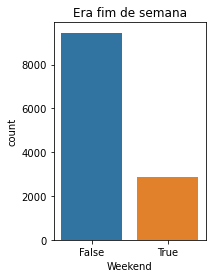

In [21]:
# Plot exibindo se o dia da compra era ou não fim de semana.
plt.subplot(1,2,2);
plt.title('Era fim de semana');
sns.countplot(df['Weekend']);

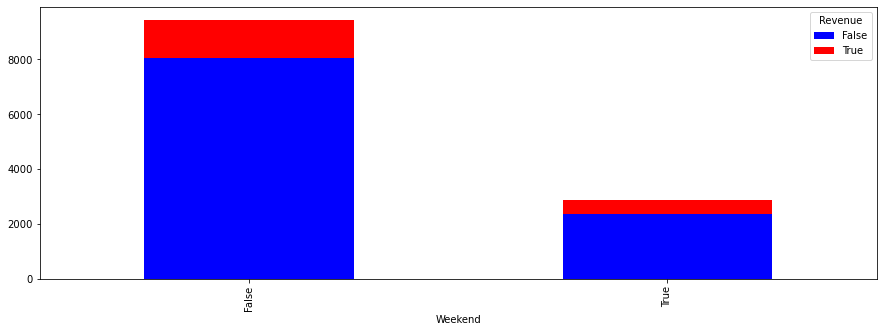

In [22]:
# Conversões baseadas no fato do dia ser ou não final de semana.
pd.crosstab(df['Weekend'], df['Revenue']).plot(kind = 'bar',
                  figsize = (15,5),
                  stacked = True,                            
                  color = ['blue','red']);

/home/igor/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


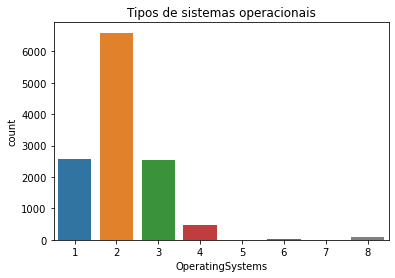

In [23]:
# Plot exibindo os tipos de SOs (Sistemas operacionais).
plt.title('Tipos de sistemas operacionais');
sns.countplot(df['OperatingSystems']);

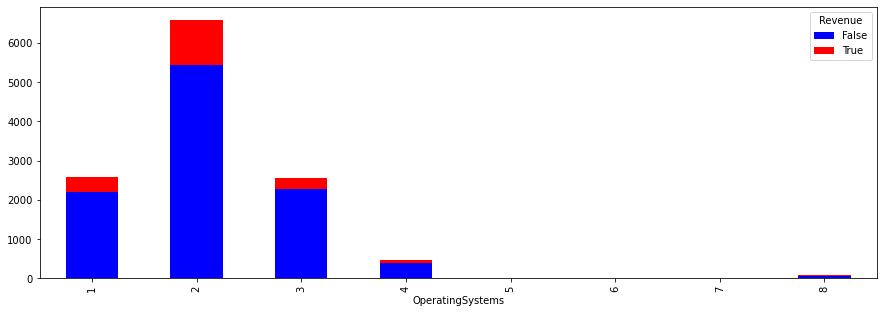

In [24]:
# Conversões baseadas no tipo de sistema operacional utilizado pelo usuário.
pd.crosstab(df['OperatingSystems'], df['Revenue']).plot(kind = 'bar',
                 stacked = True,
                 figsize = (15,5),
                 color = ['blue','red']);

/home/igor/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


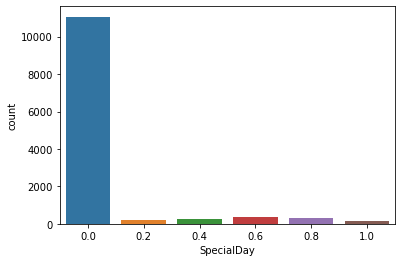

In [25]:
# Plot exibindo se havia proximidade de uma data especial.
sns.countplot(df['SpecialDay']);

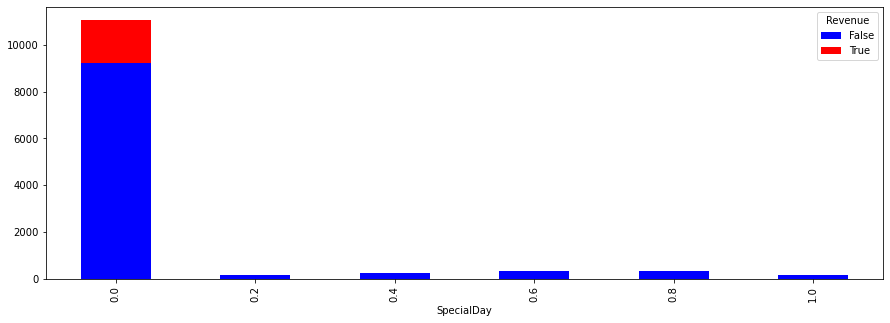

In [26]:
# Conversões baseadas em datas especiais.
pd.crosstab(df['SpecialDay'], df['Revenue']).plot(kind = 'bar',
                                                 stacked = True,
                                                 figsize = (15,5),
                                                 color = ['blue','red']);

/home/igor/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


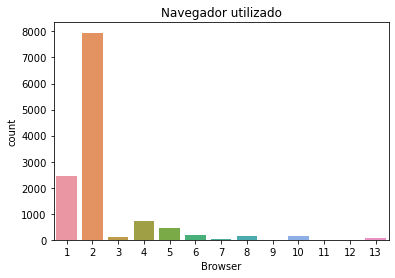

In [27]:
# Plot exibindo o tipo de browser utilizado pelo usuário.
plt.title('Navegador utilizado');
sns.countplot(df['Browser']);

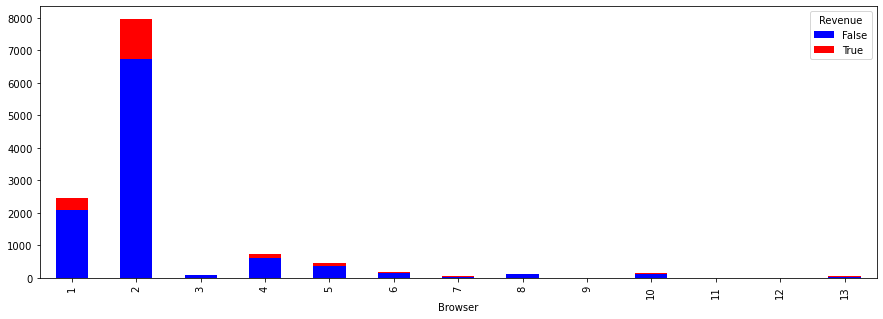

In [28]:
# Conversões baseadas no browser do visitante.
pd.crosstab(df['Browser'], df['Revenue']).plot(kind = 'bar',
                                              stacked = True,
                                              figsize = (15,5),
                                              color = ['blue','red']);

# PRÉ-PROCESSAMENTO DOS DADOS

In [29]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.693147,0.0,0.693147,1.098612,0.693147,0.788457,0.788457,0.693147,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.693147,0.0,0.693147,1.386294,4.189655,0.693147,0.741937,0.693147,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,0.000000,0.0,0.000000,1.098612,0.000000,0.788457,0.788457,0.693147,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.693147,0.0,0.693147,1.386294,1.540445,0.717840,0.760806,0.693147,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.693147,0.0,0.693147,2.484907,6.444926,0.703098,0.717840,0.693147,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [30]:
# Instanciando o LabelEnoder.
encoder = LabelEncoder()

In [31]:
# Transformando variáveis categoricas em suas respectivas representações numéricas.
df['Month'] = encoder.fit_transform(df['Month'])
df['VisitorType'] = encoder.fit_transform(df['VisitorType'])

In [32]:
# Removendo possíveis valores faltantes.
df.dropna(inplace = True)

In [33]:
# Visualizando os dados.
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.693147,0.0,0.693147,1.098612,0.693147,0.788457,0.788457,0.693147,0.0,2,1,1,1,1,2,False,False
1,0.0,0.693147,0.0,0.693147,1.386294,4.189655,0.693147,0.741937,0.693147,0.0,2,2,2,1,2,2,False,False
2,0.0,0.000000,0.0,0.000000,1.098612,0.000000,0.788457,0.788457,0.693147,0.0,2,4,1,9,3,2,False,False
3,0.0,0.693147,0.0,0.693147,1.386294,1.540445,0.717840,0.760806,0.693147,0.0,2,3,2,2,4,2,False,False
4,0.0,0.693147,0.0,0.693147,2.484907,6.444926,0.703098,0.717840,0.693147,0.0,2,3,3,1,4,2,True,False


In [34]:
# Checando o balanceamento da variável target.
df['Revenue'].value_counts()

False    10408
True      1908
Name: Revenue, dtype: int64

/home/igor/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


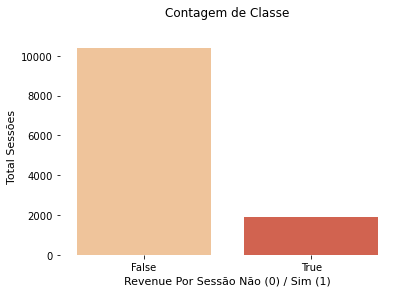

In [44]:
# Plot exibindo o balanceamento da variável target.
sns.countplot(df['Revenue'], palette = 'OrRd');
plt.box(False)
plt.xlabel('Revenue Por Sessão Não (0) / Sim (1)', fontsize = 11)
plt.ylabel('Total Sessões', fontsize = 11)
plt.title('Contagem de Classe\n');

In [36]:
# Importanto biblioteca.
import imblearn

In [37]:
from imblearn.over_sampling import SMOTE

seed = 100

# Separando os dados em X e y.
X = df.iloc[:, 0:17]
y = df.iloc[:,17]

# Instaciando o algoritmo.
smote_bal = SMOTE(random_state = seed)

# Balanceando as classes.
X_bal, y_bal = smote_bal.fit_resample(X, y)

/home/igor/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


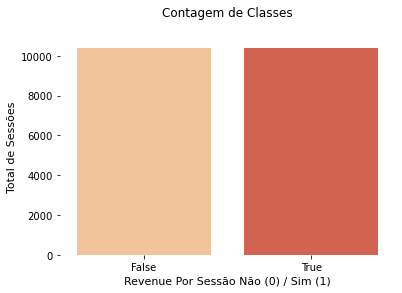

In [45]:
# Plot exibindo o balanceamento da variável target.
sns.countplot(y_bal, palette = 'OrRd');
plt.box(False)
plt.xlabel('Revenue Por Sessão Não (0) / Sim (1)',fontsize = 11)
plt.ylabel('Total de Sessões',fontsize = 11)
plt.title('Contagem de Classes\n');

In [38]:
# Checando o shape.
X_bal.shape

(20816, 17)

In [39]:
# Checando o shape.
y_bal.shape

(20816,)

In [40]:
# Atribuindo a classe balanceada ao atributo X.
X = X_bal

In [41]:
# Atribuindo a classe balanceada ao atributo y.
y = y_bal

# CRIANDO MODELOS E REALIZAÇÃO DE PREVISÕES

In [42]:
# Criando conjuntos de treino e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [46]:
# Criando o modelo versão 1.
modelo_v1 = svm.SVC(kernel = 'linear')

In [47]:
# Treinando o modelo de versão 1.
modelo_v1.fit(X_train, y_train)

SVC(kernel='linear')

In [48]:
# Fazendo previsões.
previsoes_v1 = modelo_v1.predict(X_test)

In [50]:
# Métricas obtidas por meio do primeiro modelo.
SVM_dict_v1 = {'Modelo':'SVM',
               'Versão':'1',
               'Kernel':'Linear',
               'Precision':precision_score(previsoes_v1, y_test),
               'Recall':recall_score(previsoes_v1, y_test),
               'F1 Score':f1_score(previsoes_v1, y_test),
               'Acurácia':accuracy_score(previsoes_v1, y_test),
               'AUC':roc_auc_score(y_test, previsoes_v1)}

In [51]:
# Visualizando as métricas obtidas.
SVM_dict_v1

{'Modelo': 'SVM',
 'Versão': '1',
 'Kernel': 'Linear',
 'Precision': 0.7905576679340938,
 'Recall': 0.8850656261085491,
 'F1 Score': 0.8351464435146443,
 'Acurácia': 0.8422738190552442,
 'AUC': 0.8428346772820355}

In [52]:
# Instaciando o padronizador dos dados.
sc = StandardScaler()

In [53]:
# Padronizando os dados.
X_train_sca = sc.fit_transform(X_train)
X_test_sca = sc.fit_transform(X_test)

In [54]:
# Instaciando o segundo modelo.
modelo_v2 = svm.SVC(kernel = 'linear')

In [55]:
# Treinando o segundo modelo.
modelo_v2.fit(X_train_sca, y_train)

SVC(kernel='linear')

In [56]:
# Fazendo previsões.
previsoes_v2 = modelo_v2.predict(X_test_sca)

In [57]:
# Métricas obtidas por meio do segundo modelo.
SVM_dict_v2 = {'Modelo':'SVM',
               'Versão':'2',
               'Kernel':'Linear',
               'Precision':precision_score(previsoes_v2, y_test),
               'Recall':recall_score(previsoes_v2, y_test),
               'F1 Score':f1_score(previsoes_v2, y_test),
               'Acurácia':accuracy_score(previsoes_v2, y_test),
               'AUC':roc_auc_score(y_test, previsoes_v2)}

In [58]:
# Visualizando as métricas obtidas.
SVM_dict_v2

{'Modelo': 'SVM',
 'Versão': '2',
 'Kernel': 'Linear',
 'Precision': 0.7899239543726235,
 'Recall': 0.8856127886323268,
 'F1 Score': 0.8350360073689499,
 'Acurácia': 0.8422738190552442,
 'AUC': 0.8428415498635536}

### Otimização de Hiperparâmetros com Grid Search e Kernel RBF

In [60]:
# Criando o terceiro modelo.
modelo_v3 = svm.SVC(kernel = 'rbf')

# Valores para o grid.
C_range = np.array([50., 100., 200.])
gamma_range = np.array([0.3*0.001,0.001,3*0.001])

# Grid de hiperparâmetros.
svm_param_grid = dict(gamma = gamma_range, C = C_range)

# Grid Search.
modelo_v3_grid_search_rbf = GridSearchCV(modelo_v3, svm_param_grid, cv = 3)

# Treinamento.
modelo_v3_grid_search_rbf.fit(X_train_sca, y_train)


# Acurácia em Treino.
print(f"Acurácia em Treinamento: {modelo_v3_grid_search_rbf.best_score_ :.2%}")
print("")
print(f"Hiperparâmetros Ideais: {modelo_v3_grid_search_rbf.best_params_}")

Acurácia em Treinamento: 87.39%

Hiperparâmetros Ideais: {'C': 200.0, 'gamma': 0.003}


In [61]:
# Previsões.
previsoes_v3 = modelo_v3_grid_search_rbf.predict(X_test_sca)

In [62]:
# Métricas obtidas por meio do terceiro modelo.
SVM_dict_v3 = {'Modelo':'SVM',
               'Versão':'3',
               'Kernel':'RBF com Dados Padronizados',
               'Precision':precision_score(previsoes_v3, y_test),
               'Recall':recall_score(previsoes_v3, y_test),
               'F1 Score':f1_score(previsoes_v3, y_test),
               'Acurácia':accuracy_score(previsoes_v3, y_test),
               'AUC':roc_auc_score(y_test, previsoes_v3)}

In [63]:
# Visualizando as métricas obtidas.
SVM_dict_v3

{'Modelo': 'SVM',
 'Versão': '3',
 'Kernel': 'RBF com Dados Padronizados',
 'Precision': 0.8567807351077313,
 'Recall': 0.885396201702685,
 'F1 Score': 0.87085346215781,
 'Acurácia': 0.8715772618094476,
 'AUC': 0.8717377291595633}

### Otimização de Hiperparâmetros com Grid Search e Kernel Polinomial

In [64]:
# Cria o modelo.
modelo_v4 = svm.SVC(kernel = 'poly')

# Valores para o grid.
r_range =  np.array([0.5, 1])
gamma_range =  np.array([0.001, 0.01])
d_range = np.array([2,3, 4])

# Grid de hiperparâmetros.
param_grid_poly = dict(gamma = gamma_range, degree = d_range, coef0 = r_range)

# Grid Search.
modelo_v4_grid_search_poly = GridSearchCV(modelo_v4, param_grid_poly, cv = 3)

# Treinamento.
modelo_v4_grid_search_poly.fit(X_train_sca, y_train)

# Acurácia em Treino.
print(f"Acurácia em Treinamento: {modelo_v4_grid_search_poly.best_score_ :.2%}")
print("")
print(f"Hiperparâmetros Ideais: {modelo_v4_grid_search_poly.best_params_}")

Acurácia em Treinamento: 86.53%

Hiperparâmetros Ideais: {'coef0': 1.0, 'degree': 4, 'gamma': 0.01}


In [65]:
# Previsões.
previsoes_v4 = modelo_v4_grid_search_poly.predict(X_test_sca)

In [66]:
# Métricas obtidas por meio do terceiro modelo.
SVM_dict_v4 = {'Modelo':'SVM',
               'Versão':'4',
               'Kernel':'Polinomial com Dados Padronizados',
               'Precision':precision_score(previsoes_v4, y_test),
               'Recall':recall_score(previsoes_v4, y_test),
               'F1 Score':f1_score(previsoes_v4, y_test),
               'Acurácia':accuracy_score(previsoes_v4, y_test),
               'AUC':roc_auc_score(y_test, previsoes_v4)}

In [67]:
# Visualizando as métricas obtidas.
SVM_dict_v4

{'Modelo': 'SVM',
 'Versão': '4',
 'Kernel': 'Polinomial com Dados Padronizados',
 'Precision': 0.8368187579214195,
 'Recall': 0.8835731013716962,
 'F1 Score': 0.859560618388934,
 'Acurácia': 0.8618094475580464,
 'AUC': 0.8620804699286604}

In [68]:
# Concatena todos os dicionários em um dataframe do Pandas.
resumo = pd.DataFrame({'SVM_dict_v1':pd.Series(SVM_dict_v1),
                       'SVM_dict_v2':pd.Series(SVM_dict_v2),
                       'SVM_dict_v3':pd.Series(SVM_dict_v3),
                       'SVM_dict_v4':pd.Series(SVM_dict_v4)})

In [69]:
# Visualizando o resumo.
resumo

,SVM_dict_v1,SVM_dict_v2,SVM_dict_v3,SVM_dict_v4
Modelo,SVM,SVM,SVM,SVM
Versão,1,2,3,4
Kernel,Linear,Linear,RBF com Dados Padronizados,Polinomial com Dados Padronizados
Precision,0.790558,0.789924,0.856781,0.836819
Recall,0.885066,0.885613,0.885396,0.883573
F1 Score,0.835146,0.835036,0.870853,0.859561
Acurácia,0.842274,0.842274,0.871577,0.861809
AUC,0.842835,0.842842,0.871738,0.86208


### PREVISÕES COM O MELHOR MODELO FEITO

In [70]:
# Novo registro.
novo_x = np.array([4.0, 5.56, 1.0, 3.78, 2.995, 6.00, 0.69, 0.70, 0.69, 0, 6, 1, 1, 3, 3, 2, False]).reshape(1, -1)

In [71]:
# Padronizando o registro.
novo_x_scaled = StandardScaler().fit_transform(novo_x)

In [72]:
# Realizando previsões.
previsao_novo_x = modelo_v3_grid_search_rbf.predict(novo_x_scaled)

In [73]:
# Verificando a previsão.
previsao_novo_x

array([ True])